# Explore here

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv",sep=',')
data.to_csv('/workspaces/regrecion_linear_joel/data/raw/medical_insurance_cost.csv',index=False)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [117]:
data.shape


(1338, 7)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [119]:
data.nunique()


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [120]:
data.duplicated().sum()


1

In [121]:
data.drop_duplicates().reset_index(drop = True)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [122]:
data.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [123]:
data['n_sex']= pd.factorize(data["sex"])[0]

In [124]:
df_encoded = pd.get_dummies(data['smoker'], prefix='smoker')
data = pd.concat([data,df_encoded],axis=1)

In [125]:
data['n_region']= pd.factorize(data["region"])[0] 

In [126]:
data.drop(['sex','smoker','region'],axis=1,inplace=True)

In [127]:
data

,age,bmi,children,charges,n_sex,smoker_no,smoker_yes,n_region
0,19,27.900,0,16884.92400,0,False,True,0
1,18,33.770,1,1725.55230,1,True,False,1
2,28,33.000,3,4449.46200,1,True,False,1
3,33,22.705,0,21984.47061,1,True,False,2
4,32,28.880,0,3866.85520,1,True,False,2
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,True,False,2
1334,18,31.920,0,2205.98080,0,True,False,3
1335,18,36.850,0,1629.83350,0,True,False,1
1336,21,25.800,0,2007.94500,0,True,False,0


In [128]:
data['smoker_N'] = data['smoker_yes']
data.drop(['smoker_yes','smoker_no'],axis=1,inplace=True)

In [129]:
data

,age,bmi,children,charges,n_sex,n_region,smoker_N
0,19,27.900,0,16884.92400,0,0,True
1,18,33.770,1,1725.55230,1,1,False
2,28,33.000,3,4449.46200,1,1,False
3,33,22.705,0,21984.47061,1,2,False
4,32,28.880,0,3866.85520,1,2,False
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,2,False
1334,18,31.920,0,2205.98080,0,3,False
1335,18,36.850,0,1629.83350,0,1,False
1336,21,25.800,0,2007.94500,0,0,False


In [130]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,age,bmi,children,charges,n_sex,n_region,smoker_N
age,1.000,0.109,0.042,0.299,-0.021,-0.002,-0.025
bmi,0.109,1.000,0.013,0.198,0.046,-0.158,0.004
children,0.042,0.013,1.000,0.068,0.017,-0.017,0.008
charges,0.299,0.198,0.068,1.000,0.057,0.006,0.787
n_sex,-0.021,0.046,0.017,0.057,1.000,-0.005,0.076
n_region,-0.002,-0.158,-0.017,0.006,-0.005,1.000,0.002
smoker_N,-0.025,0.004,0.008,0.787,0.076,0.002,1.000


In [131]:
corr.charges

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
n_sex       0.057292
n_region    0.006208
smoker_N    0.787251
Name: charges, dtype: float64

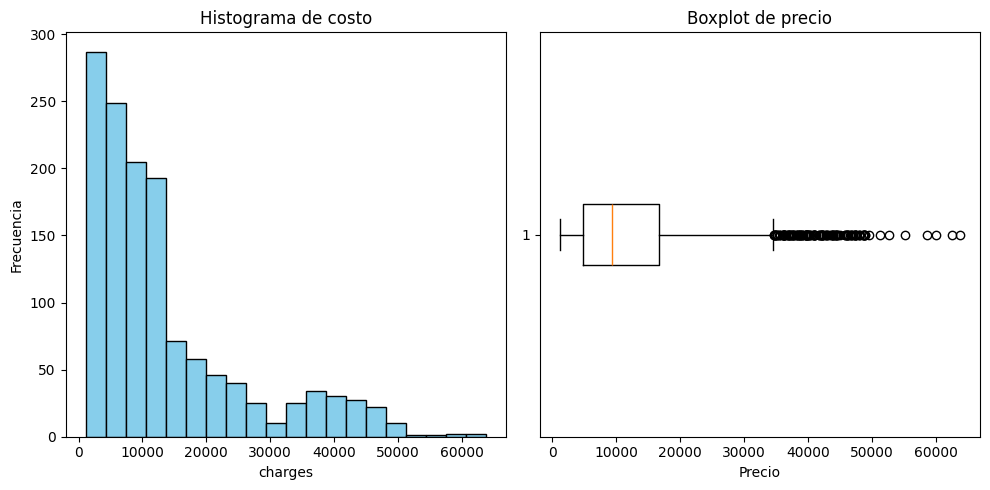

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data['charges'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de costo')
ax[0].set_xlabel('charges')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(data['charges'], vert=False)
ax[1].set_title('Boxplot de precio')
ax[1].set_xlabel('Precio')

plt.tight_layout()
plt.show()

In [133]:
X = data.drop(['charges'], axis=1)
X = X.astype(int)
y = data['charges']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
cooks_distance = model.get_influence().cooks_distance

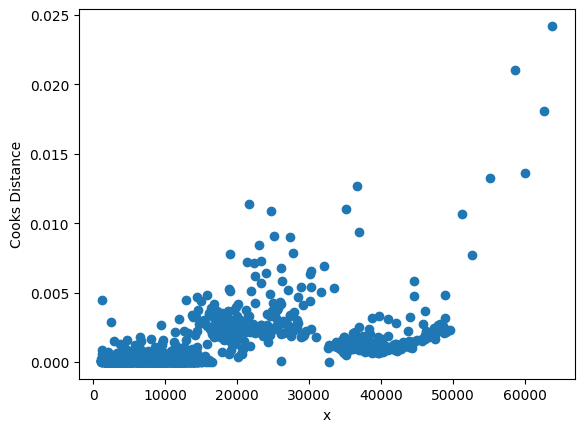

In [134]:
plt.scatter(data.charges, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [135]:
data = data[data.charges < 50000]

In [136]:
data.apply(lambda x: x.skew())

age         0.057116
bmi         0.283592
children    0.936365
charges     1.452558
n_sex      -0.019557
n_region    0.037112
smoker_N    1.497000
dtype: float64

In [137]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,age,bmi,children,charges,n_sex,n_region,smoker_N
age,1.000,0.108,0.043,0.305,-0.022,-0.001,-0.028
bmi,0.108,1.000,0.015,0.187,0.049,-0.158,-0.006
children,0.043,0.015,1.000,0.077,0.016,-0.018,0.011
charges,0.305,0.187,0.077,1.000,0.058,0.009,0.786
n_sex,-0.022,0.049,0.016,0.058,1.000,-0.002,0.076
n_region,-0.001,-0.158,-0.018,0.009,-0.002,1.000,0.004
smoker_N,-0.028,-0.006,0.011,0.786,0.076,0.004,1.000


In [138]:
corr.charges

age         0.304561
bmi         0.187061
children    0.076993
charges     1.000000
n_sex       0.057519
n_region    0.009306
smoker_N    0.785617
Name: charges, dtype: float64

In [139]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Vamos a usar un método embebido que nos informe de la importancia de las características
# Crea un modelo XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

# Entrena el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# Calcula la importancia de las características
feature_importances = model.feature_importances_

# Asocia las importancias con los nombres de las características
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Ordena las características por importancia (de mayor a menor)
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Imprime la importancia de las características (número adimensional, las características se comparan entre sí en términos de su contribución relativa a la predicción)
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance}')

Feature: smoker_N, Importance: 0.9548221230506897
Feature: bmi, Importance: 0.015087181702256203
Feature: age, Importance: 0.014047509990632534
Feature: children, Importance: 0.008043886162340641
Feature: n_region, Importance: 0.004453025758266449
Feature: n_sex, Importance: 0.003546255873516202


In [142]:
def get_vars_to_delete(d_imp, corr, imp_cut=0.005, corr_cut=0.1):
  ls_vars_low_corr = corr[corr.charges.abs()<=corr_cut].index
  return [var for var in ls_vars_low_corr if d_imp[var]<=imp_cut]

In [143]:
vars_to_drop = get_vars_to_delete(sorted_feature_importance, corr, imp_cut=0.01, corr_cut=0.15)
vars_to_drop

['children', 'n_sex', 'n_region']

In [144]:
data.drop(vars_to_drop, axis=1, inplace=True)

/tmp/ipykernel_482/848054774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(vars_to_drop, axis=1, inplace=True)


In [145]:
data

,age,bmi,charges,smoker_N
0,19,27.900,16884.92400,True
1,18,33.770,1725.55230,False
2,28,33.000,4449.46200,False
3,33,22.705,21984.47061,False
4,32,28.880,3866.85520,False
...,...,...,...,...
1333,50,30.970,10600.54830,False
1334,18,31.920,2205.98080,False
1335,18,36.850,1629.83350,False
1336,21,25.800,2007.94500,False


In [146]:
binary_cols = data[(data == 0)|(data == 1)].dropna(axis=1).columns
data_num = data.drop(binary_cols, axis=1)
scaler = MinMaxScaler().fit(data_num)
data_sc = scaler.transform(data_num)

In [147]:
data_sc = pd.concat([pd.DataFrame(data_sc, columns = data_num.columns) , data[binary_cols].reset_index(drop = True)],axis=1)

data_sc



,age,bmi,charges,smoker_N
0,0.021739,0.321227,0.325308,True
1,0.000000,0.479150,0.012458,False
2,0.217391,0.458434,0.068673,False
3,0.326087,0.181464,0.430549,False
4,0.304348,0.347592,0.056649,False
...,...,...,...,...
1326,0.695652,0.403820,0.195615,False
1327,0.000000,0.429379,0.022373,False
1328,0.000000,0.562012,0.010483,False
1329,0.065217,0.264730,0.018286,False


In [148]:
X = data_sc.drop(['charges'], axis=1)
y = data_sc['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
X_train["charges"] = y_train.values
X_test["charges"] = y_test.values
X_train.to_csv("../data/processed/clean_train.csv", index = False)
X_test.to_csv("../data/processed/clean_test.csv", index = False)

In [150]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")


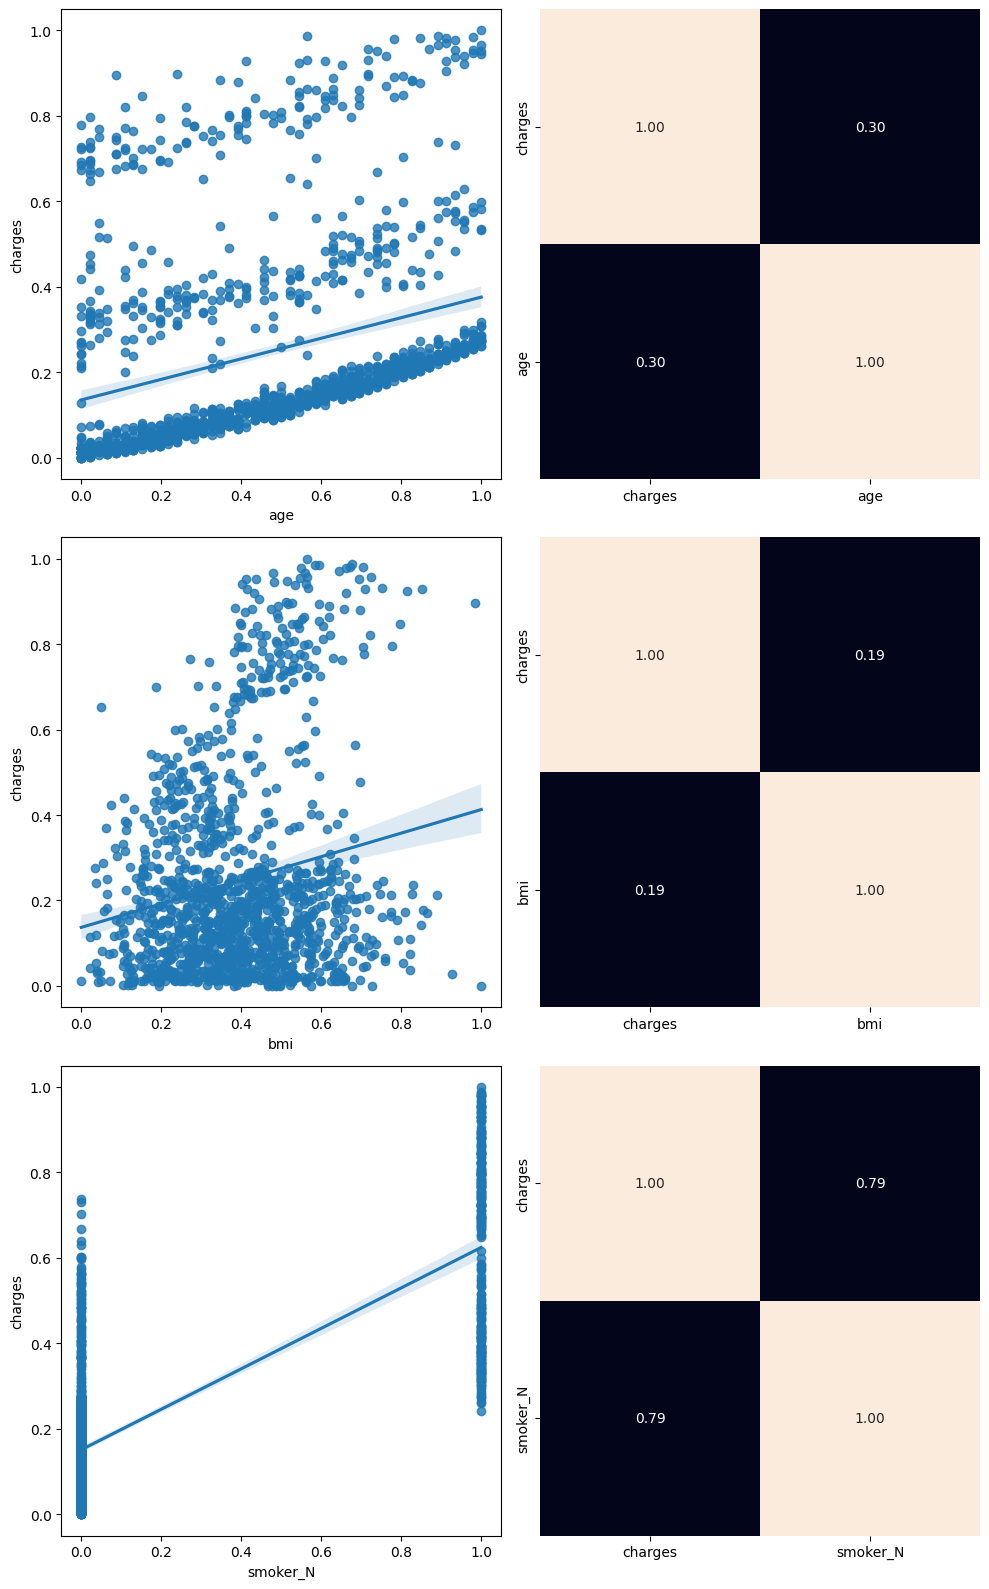

In [151]:
fig, axis = plt.subplots(3, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = data_sc, x = "age", y = "charges")
sns.heatmap(data_sc[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[0, 1], cbar = False)
sns.regplot(ax = axis[1, 0], data = data_sc, x = "bmi", y = "charges")
sns.heatmap(data_sc[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = data_sc, x = "smoker_N", y = "charges")
sns.heatmap(data_sc[["charges", "smoker_N"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1], cbar = False)
plt.tight_layout()

plt.show()

In [152]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [153]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [154]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): -0.041905515585952596
Coeficientes (b1, b2): [0.24565122 0.20020154 0.47259843]


In [155]:
y_pred = model.predict(X_test)
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.01493255806102627
Coeficiente de determinación: 0.7791650640598348
